In [1]:
import geopandas as gpd 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from datetime import datetime

In [2]:
# Replace 'path/to/your/csv/file.csv' with the actual path to your CSV file
data = pd.read_csv('/home/sallyfons/MLEE/turkey_earthquakes(1915-2021).csv')

# Translate the header names from Turkish to English
data = data.rename(columns={'Deprem Kodu': 'Earthquake Code', 'Olus tarihi': 'date', 'Olus zamani': 'time', 'Enlem': 'latitude', 'Boylam': 'longitude', 'Derinlik': 'depth', 'Tip': 'Type (eq/ex)', 'Yer': 'Location'})


# Convert the date and time columns to datetime format
data['datetime'] = pd.to_datetime(data['date'] + ' ' + data['time'], format='%d/%m/%Y %H:%M:%S')

# Sort the data by date
data = data.sort_values('datetime', ascending=True)
# Filter out rows with missing or invalid dates

data = data[data['datetime'].notnull()]

# Convert the datetime column to numeric format
data['date_num'] = data['datetime'].apply(lambda x: datetime.timestamp(x))



print(f' Numeric dates that are NaN: {data["date_num"].isnull().sum()}')
print(f' Latitude that are NaN: {data["latitude"].isnull().sum()}')
print(f' Moment Magnitude that are NaN or 0: {(data["Mw"].isnull() | (data["Mw"] == 0)).sum()}')
print(f' Local Magnitude that are NaN or 0: {(data["ML"].isnull() | (data["ML"] == 0)).sum()}')
count = ((data['Mw'].isnull() | (data['Mw'] == 0)) & (data['ML'].isnull() | (data['ML'] == 0))).sum()
print(f'Number of rows where both "Mw" and "ML" are either 0 or NaN: {count}')
print(f' Depths that are NaN: {data["depth"].isnull().sum()}')

#Due to high number of NaN in Mw, ML will be used. Also the same one as in the Italy Earthquake Prediction model
data = data.rename(columns={'ML': 'magnitude'})
# Drop rows where the values of ML are NaN
data = data.dropna(subset=['magnitude'], how='any')

# Drop rows where the values of ML are 0
data = data[data['magnitude'] != 0]

# Print the data
print(data)
print(f' Moment Magnitude that are NaN or 0: {(data["Mw"].isnull() | (data["Mw"] == 0)).sum()}')

 Numeric dates that are NaN: 0
 Latitude that are NaN: 0
 Moment Magnitude that are NaN or 0: 12894
 Local Magnitude that are NaN or 0: 8491
Number of rows where both "Mw" and "ML" are either 0 or NaN: 8440
 Depths that are NaN: 0
          No  Earthquake Code        date      time  latitude  longitude  \
6087   17370     1.915020e+13  14/02/1915  08:20:01   38.8000    42.5000   
9099   17369     1.915020e+13  28/02/1915  12:47:02   37.7000    43.1000   
4392   17368     1.915040e+13  01/04/1915  05:41:05   40.5000    44.5000   
3745   17367     1.915050e+13  19/05/1915  04:48:02   37.6200    39.4700   
4672   17365     1.915120e+13  25/12/1915  06:06:09   36.4700    36.1400   
...      ...              ...         ...       ...       ...        ...   
14315      5     2.020120e+13  27/12/2020  20:08:37   38.4172    39.1482   
9683       4     2.020120e+13  30/12/2020  13:40:12   37.7960    26.4165   
13291      3     2.020120e+13  30/12/2020  18:45:13   36.4918    28.7092   
694      

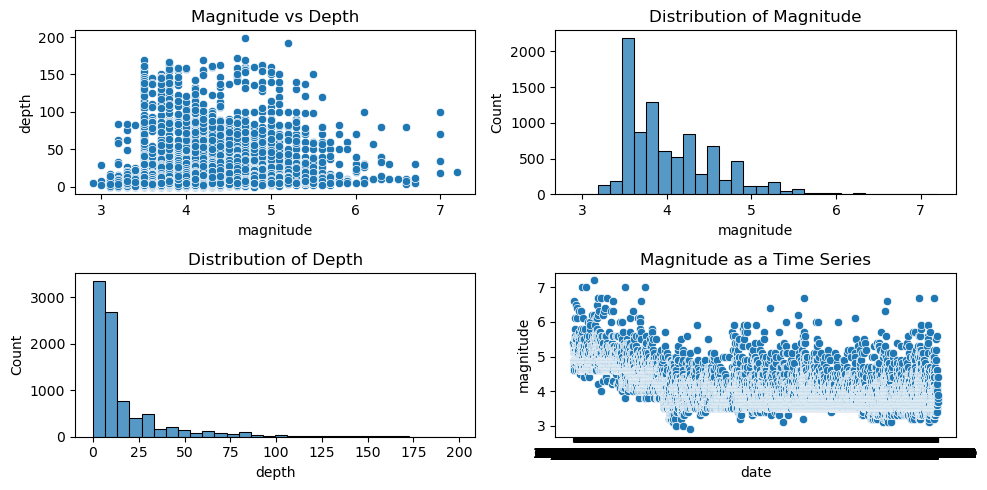

In [16]:
# Create a figure with subplots
fig, axes = plt.subplots(2, 2, figsize=(10, 5))

# Scatter plot of magnitude vs depth
sns.scatterplot(x='magnitude', y='depth', data=data, ax=axes[0, 0])
axes[0, 0].set_title('Magnitude vs Depth')

# Distribution plot of magnitude
sns.histplot(data['magnitude'], bins=30, ax=axes[0, 1])
axes[0, 1].set_title('Distribution of Magnitude')

# Distribution plot of depth
sns.histplot(data['depth'], bins=30, ax=axes[1, 0])
axes[1, 0].set_title('Distribution of Depth')

# Scatter plot of magnitude as a time series
sns.scatterplot(x='date', y='magnitude', data=data, ax=axes[1, 1])
axes[1, 1].set_title('Magnitude as a Time Series')

# Adjust the spacing between subplots
plt.tight_layout()

# Show the figure
plt.show()

/tmp/ipykernel_1119542/1701377194.py:5: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


RuntimeError: No mappable was found to use for colorbar creation. First define a mappable such as an image (with imshow) or a contour set (with contourf).

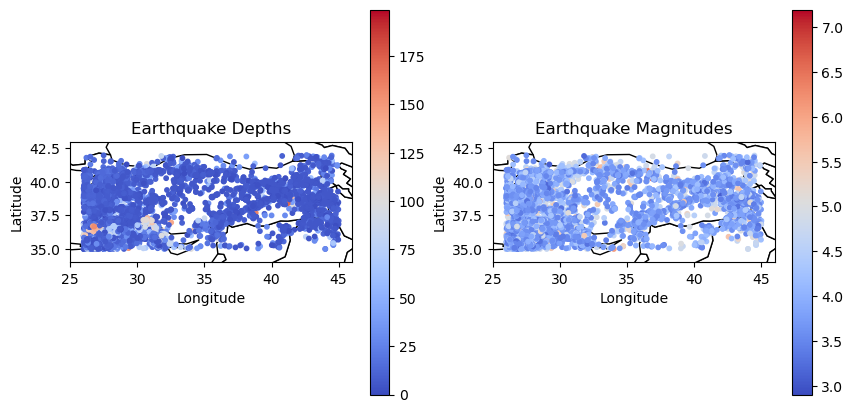

In [17]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Load the country borders shapefile
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Create a GeoDataFrame from the latitude and longitude columns
geometry = gpd.points_from_xy(data['longitude'], data['latitude'])
gdf_eq = gpd.GeoDataFrame(data, geometry=geometry)

# Create a figure with subplots
fig, ax = plt.subplots(1, 2, figsize=(10, 5))

# Set the x-axis and y-axis limits based on the data
ax[0].set_xlim(data['longitude'].min() - 1, data['longitude'].max() + 1)
ax[0].set_ylim(data['latitude'].min() - 1, data['latitude'].max() + 1)
ax[1].set_xlim(data['longitude'].min() - 1, data['longitude'].max() + 1)
ax[1].set_ylim(data['latitude'].min() - 1, data['latitude'].max() + 1)
# Plot the country borders as a background map
world.plot(ax=ax[0], color='white', edgecolor='black')
world.plot(ax=ax[1], color='white', edgecolor='black')
# Set the aspect ratio of the plot
ax[0].set_aspect('equal')
ax[1].set_aspect('equal')
# Plot the data points
gdf_eq.plot(ax=ax[0], column='depth', cmap='coolwarm', markersize= 10 , legend=True)
gdf_eq.plot(ax=ax[1], column='magnitude', cmap='coolwarm', markersize=10, legend=True)

# Set the plot title and axis labels
ax[0].set_title('Earthquake Depths')
ax[0].set_xlabel('Longitude')
ax[0].set_ylabel('Latitude')
ax[1].set_title('Earthquake Magnitudes')
ax[1].set_xlabel('Longitude')
ax[1].set_ylabel('Latitude')

# Show the colorbar
plt.colorbar(ax= ax[0], label='Depth')
plt.colorbar(ax=ax[1], label='Magnitude')

# Show the plot
plt.show()


Beginning of the first Machine Learning Algorithm

In [6]:
#import relevant Modules for ML
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score


In [8]:
from sklearn.linear_model import LinearRegression

# Define predictors
X = data[['latitude', 'longitude', 'depth', 'date_num']]
y = data[['magnitude']]

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Linear Regression model
mlr_model = LinearRegression()

# Fit the model to the training data
mlr_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = mlr_model.predict(X_test)

# Calculate the mean squared error
mse = mean_squared_error(y_test, y_pred)

# Calculate the R2 score
rmse = np.sqrt(mse) 

# Print the metrics
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)


Mean Squared Error: 0.19866573193011916
Root Mean Squared Error: 0.4457193421090442


In [42]:
# Define predictors
X = data[['latitude', 'longitude', 'depth', 'date_num']]
y = data[['magnitude']]

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Split the training set into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

#Normalize dataset
#import StandardScaler object
# scaler  = StandardScaler()
# scaler.fit(X_train)

# #applying the transform on our datasets
# X_train = scaler.transform(X_train)
# X_val = scaler.transform(X_val)
# X_test = scaler.transform(X_test)

#initializing a random forest regressor on our dataset with standard parameters: this will be fine tuned later
# rf_model = RandomForestRegressor(n_estimators=100, random_state=42) 
# rf_model.fit(X_train, y_train)
# y_pred = rf_model.predict(X_test) 

# Define the parameter grid to search
param_grid = {
    'n_estimators': [200],
    'max_depth': [20],
    'min_samples_split': [2],
    'min_samples_leaf': [4]
}

# Initialize the Random Forest Regressor
rf_regressor = RandomForestRegressor(random_state=42)

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=rf_regressor, param_grid=param_grid, 
                           scoring='neg_root_mean_squared_error', cv=5)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Print the best hyperparameters
best_params = grid_search.best_params_
print(f'Best Hyperparameters: {best_params}')

# Get the best model from the grid search
best_rf_model = grid_search.best_estimator_

# Make predictions on the validation set
y_val_pred = best_rf_model.predict(X_val)

# Evaluate the model on the validation set
mse_val = mean_squared_error(y_val, y_val_pred)
print(f'Mean Squared Error on Validation Set: {mse_val}')

/home/sallyfons/anaconda3/envs/instance/lib/python3.10/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/home/sallyfons/anaconda3/envs/instance/lib/python3.10/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/home/sallyfons/anaconda3/envs/instance/lib/python3.10/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/home/sallyfons/anaconda3/envs/instance/lib/python3.10/site-packages/sklearn/base.py:1152: DataConversionWarning: A co

Best Hyperparameters: {'max_depth': 20, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 200}
Mean Squared Error on Validation Set: 0.15438925634913195


In [43]:
#Test the model and make the predictions
y_pred = best_rf_model.predict(X_test)
print(best_rf_model.score(X_test, y_test))


0.4479057515100726


EVALUATING THE MODEL

Mean Squared Error: 0.17353076340998821
R-squared: 0.4479057515100726
Root Mean Squared Error: 0.41657023826719575
Mean Squared Error on Validation Set: 0.15438925634913195
Root Mean Squared Error on Validation Set: 0.3929239829141662
Mean Squared Error on Training Set: 0.07891484546754503
Root Mean Squared Error on Training Set: 0.28091786249283796


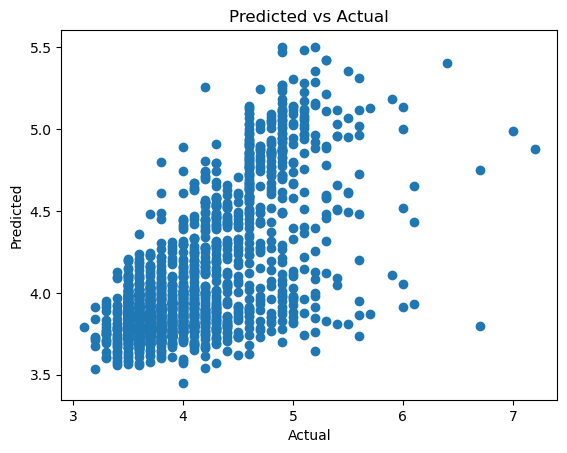

In [45]:
# Calculate the mean squared error
mse = mean_squared_error(y_test, y_pred)
# Calculate the R2 score
r2 = r2_score(y_test, y_pred)
#Calculating the RMSE
rmse = np.sqrt(mse)
#Calculating MAPE
#mape = np.mean(np.abs((y_test - y_pred)/y_test))*100

# Print the metrics
print("Mean Squared Error:", mse)
print(f'R-squared: {r2}')
print(f'Root Mean Squared Error: {rmse}')
#print(f'Mean Absolute Percentage Error: {mape}')

# Evaluate the model on the validation set
mse_val = mean_squared_error(y_val, y_val_pred)
rmse_val = np.sqrt(mse_val)
print(f'Mean Squared Error on Validation Set: {mse_val}')
print(f'Root Mean Squared Error on Validation Set: {rmse_val}')

#Evaluate on the training set?
mse_tra = mean_squared_error(y_train, best_rf_model.predict(X_train))
rmse_tra = np.sqrt(mse_tra)
print(f'Mean Squared Error on Training Set: {mse_tra}')
print(f'Root Mean Squared Error on Training Set: {rmse_tra}')

# Create a scatter plot of y_pred vs y_test
plt.scatter(y_test, y_pred)

# Set the plot title and axis labels
plt.title('Predicted vs Actual')
plt.xlabel('Actual')
plt.ylabel('Predicted')

# Show the plot
plt.show()


CALCULATING GUTENBERG-RICHTER VALUES

a value: 6.692432688190421
b value: -0.9272003131435862
coefficients: [-0.92720031  6.69243269]


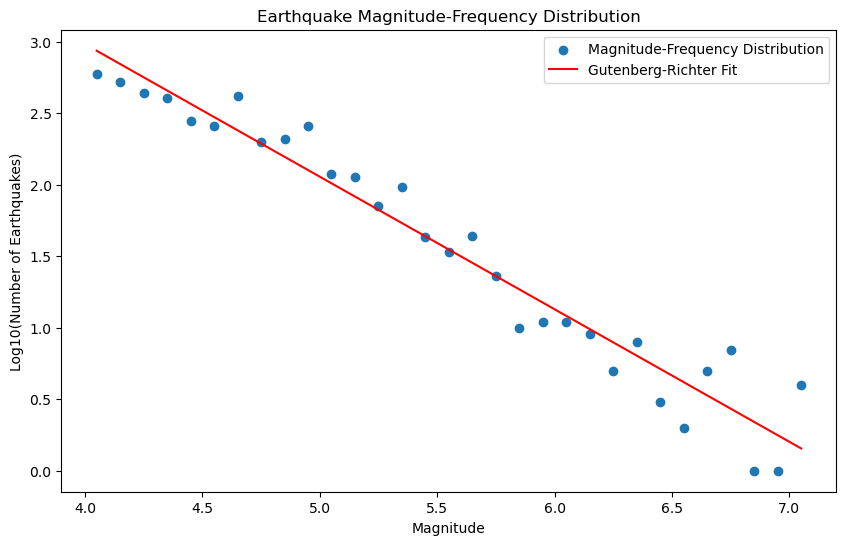

In [4]:
#Count number of earthquakes for each magnitude & extract vaues from midpoint of bins
mag_counts, mag_bins = np.histogram(data['magnitude'], bins=np.arange(4, data['magnitude'].max(), 0.1))
mag_values = (mag_bins[:-1] + mag_bins[1:]) / 2

# Perform linear regression on the log-transformed data
log_mag_counts = np.log10(np.where(mag_counts > 0, mag_counts, 1))

# Fit a linear function to the log-transformed data
coeff = np.polyfit(mag_values, log_mag_counts, 1)
b, a = coeff

# Display the results
print(f"a value: {a}")
print(f"b value: {b}")
print(f"coefficients: {coeff}")

# Plot the earthquake magnitude-frequency distribution
plt.figure(figsize=(10, 6))
plt.scatter(mag_values, log_mag_counts, label='Magnitude-Frequency Distribution')
plt.xlabel('Magnitude')
plt.ylabel('Log10(Number of Earthquakes)')
plt.title('Earthquake Magnitude-Frequency Distribution')

# Plot the fitted curve
plt.plot(mag_values, a + b * mag_values, color='red', label='Gutenberg-Richter Fit')

# Display the legend
plt.legend()

# Show the plot
plt.show()